## Step 1: Downloading the data

The url for the pima-indian-diabetes data set is found at:  https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/ and the directory contains 2 important files, 1 being the dataset itself in a .txt format, and the other is the description of the data. While there is always the option of manually downloading the data and description files into the local drive, importing them straight from website will create less clutter.

In [1]:
root = 'https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/'
dataset = 'pima-indians-diabetes.data'
description = 'pima-indians-diabetes.names'

In [2]:
import requests
import sys
import pandas as pd
from io import StringIO

desc_res = requests.get(root+description)
data_res = requests.get(root+dataset)


def get_desc(res):
    '''This function gets the description of the dataset straight from the UCI repository'''

    if res.status_code != 200:
        sys.stdout.write('File not found, try downloading straight from website')
        sys.stdout.flush()
    else:
        desc = res.text  
        
    return print(desc)
 
    
def get_data(data):
    '''This function gets the data straight from the UCI repository and formats it from .txt into a dataframe.'''
    
    if data.status_code != 200:
        sys.stdout.write('Data not found, try downloading straight from website')
        sys.stdout.flush()
    else:
        df = pd.read_csv(StringIO(data_res.text),header=None)
        
    return df

df = get_data(data_res)

In [3]:
print(get_desc(desc_res))

1. Title: Pima Indians Diabetes Database

2. Sources:
   (a) Original owners: National Institute of Diabetes and Digestive and
                        Kidney Diseases
   (b) Donor of database: Vincent Sigillito (vgs@aplcen.apl.jhu.edu)
                          Research Center, RMI Group Leader
                          Applied Physics Laboratory
                          The Johns Hopkins University
                          Johns Hopkins Road
                          Laurel, MD 20707
                          (301) 953-6231
   (c) Date received: 9 May 1990

3. Past Usage:
    1. Smith,~J.~W., Everhart,~J.~E., Dickson,~W.~C., Knowler,~W.~C., \&
       Johannes,~R.~S. (1988). Using the ADAP learning algorithm to forecast
       the onset of diabetes mellitus.  In {\it Proceedings of the Symposium
       on Computer Applications and Medical Care} (pp. 261--265).  IEEE
       Computer Society Press.

       The diagnostic, binary-valued variable investigated is whether the
       patien

In [4]:
print(get_data(data_res))

      0    1   2   3    4     5      6   7  8
0     6  148  72  35    0  33.6  0.627  50  1
1     1   85  66  29    0  26.6  0.351  31  0
2     8  183  64   0    0  23.3  0.672  32  1
3     1   89  66  23   94  28.1  0.167  21  0
4     0  137  40  35  168  43.1  2.288  33  1
5     5  116  74   0    0  25.6  0.201  30  0
6     3   78  50  32   88  31.0  0.248  26  1
7    10  115   0   0    0  35.3  0.134  29  0
8     2  197  70  45  543  30.5  0.158  53  1
9     8  125  96   0    0   0.0  0.232  54  1
10    4  110  92   0    0  37.6  0.191  30  0
11   10  168  74   0    0  38.0  0.537  34  1
12   10  139  80   0    0  27.1  1.441  57  0
13    1  189  60  23  846  30.1  0.398  59  1
14    5  166  72  19  175  25.8  0.587  51  1
15    7  100   0   0    0  30.0  0.484  32  1
16    0  118  84  47  230  45.8  0.551  31  1
17    7  107  74   0    0  29.6  0.254  31  1
18    1  103  30  38   83  43.3  0.183  33  0
19    1  115  70  30   96  34.6  0.529  32  1
20    3  126  88  41  235  39.3  0

Now, we have both the description of the data and the actual dataset saved as 'desc' and 'df' respectively. It is now time to use desc as a reference to clean up df for EDA and further analysis. From point #7 in desc, we can see that each columns from 0 to 7 represents a variable and the last column 8 is a binary result of 1 and 0 to signifify whether or not a person has diabetes.

## Step 2: Cleaning up the data

In [5]:
dfcol = ['preg','gluc','blood','skin','insul','bmi','dpf','age','diab']
df.columns = dfcol
print('There are null values in the dataframe: ' + str(df.isnull().values.any()))
df.describe()

There are null values in the dataframe: False


,preg,gluc,blood,skin,insul,bmi,dpf,age,diab
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


From the initial descriptive statistics, we can tell that around 35% of all individuals in the study has tested positive for diabetes according to the standards. The next step is to now do some EDA to learn more about our dataset, and to split our dataset into testing and training sections to validate our model later on.

### Splitting data into training and test sets

In [6]:
'''Splitting data up into training and testing sets with seed set = 123, and stratified according to the proportion of diabetic individuals.'''
test_size, train_size = 0.2, 0.8
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=test_size, random_state=123, stratify=df['diab'])
print('Training sample has ' + str(len(df_train)) + ' datapoints.')
print('Testing sample has ' + str(len(df_test)) + ' datapoints.')

Training sample has 614 datapoints.
Testing sample has 154 datapoints.


## Step 3: Exploratory Data Analysis

### Feature - diabetes relationships

The first step in EDA is to take each individual factor as a stand-alone risk, and to search for any apparent trends with respect to having diabetes or not.

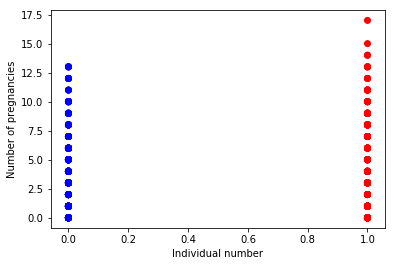

In [12]:
import matplotlib.pyplot as plt
import numpy as np

test = df_train[['preg','diab']]
col = np.where(test['diab']==1,'r','b')
plt.scatter(test['diab'],test['preg'],c=col)
plt.xlabel('Individual number')
plt.ylabel('Number of pregnancies')
plt.show()

As one can observe from the plot, gaining insights from a plot of diabetes status against risk factor proves to be quite difficult unless there is an extremely clear pattern. Another method is to then plot each individual's risk factor as a data point and vary the colour of the data point based on the diabetic status of that individual.

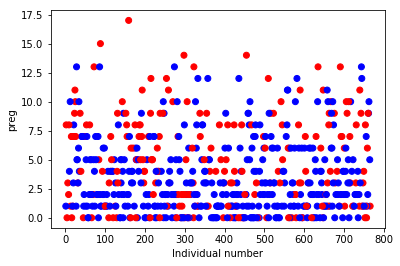

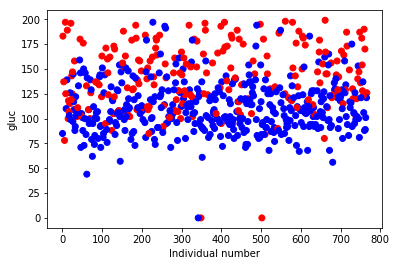

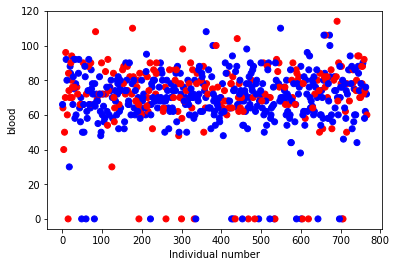

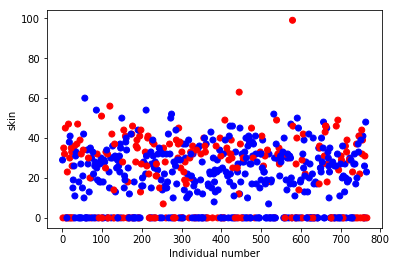

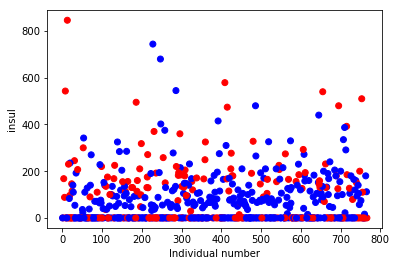

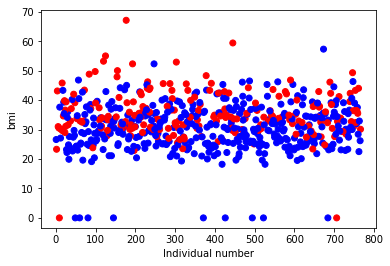

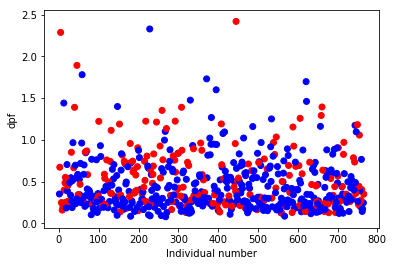

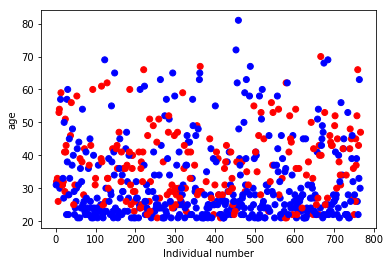

In [8]:
'''The idea here is to extract each feature and append it to the diabetes column to get a scatterplot'''
factors = dfcol[0:len(dfcol)-1]
risks = [df_train[[factor,'diab']] for factor in factors]
for plots in risks:
    col = np.where(plots['diab']==1,'r','b')
    plt.scatter(plots.index, plots.iloc[:,0], c=col)
    plt.xlabel('Individual number')
    plt.ylabel(str(plots.columns[0]))
    plt.show()

Unfortunately, not all of the risk factors alone show a pattern with having diabetes. However, from observing the different plots we argue that diabetes is more evident in individuals with <br>1. Higher plasma glucose conentration (gluc) <br>2. Higher body mass index (bmi) <br> 3. Older (age) <br><br>We could get more insight into the data by grouping each risk into percentiles and spotting any trend of diabetes as we move up each bin instead of just looking at the graphs.

In [45]:
quantiles = 5
#input has to be in the form of a str, ""
def get_diabetic(fac, quantiles=quantiles):
    '''This function gets the number of diabetic individuals in a certain bin given a feature, and the number of bins. Please input fac as a str.'''
    
    inter = risks[factors.index(fac)].reset_index()
    inter['index'] = pd.qcut(inter[fac], quantiles, labels=False, duplicates='drop')
    diabetic = inter.groupby(['index','diab']).count().reset_index()
    diabetic = diabetic[diabetic.diab == 1].drop('diab',1).reset_index().drop('level_0',1)
    
    return diabetic
    
    
def get_bin_total(fac, quantiles=quantiles):
    '''This function just gets the total number of individuals within a bin given a feature and the number of bins.'''
    
    inter = risks[factors.index(fac)].reset_index()
    inter['index'] = pd.qcut(inter[fac], quantiles, labels=False, duplicates='drop')
    bin_total = inter.groupby('index').count().reset_index()
    bin_total = bin_total.drop('diab',1)
    
    return bin_total

In [46]:
get_bin_total('preg')

,index,preg
0,0,196
1,1,85
2,2,113
3,3,117
4,4,103


The above 2 functions extracts each risk factor individually and splits the series up into desired quantiles. The next step is then to calculate the percentages of diabetic individuals in each catergory and spot trends and patterns.

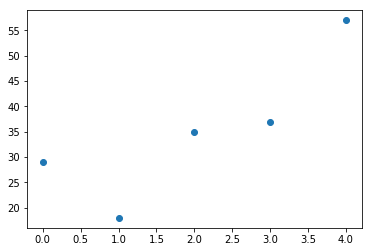

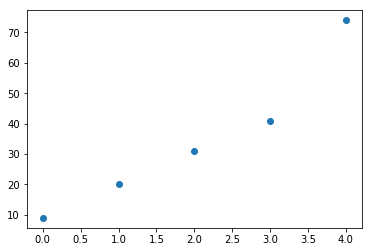

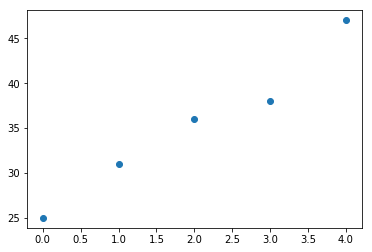

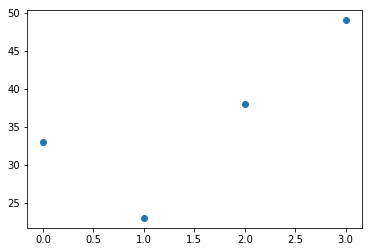

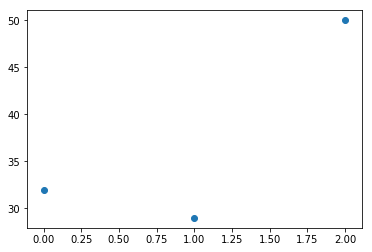

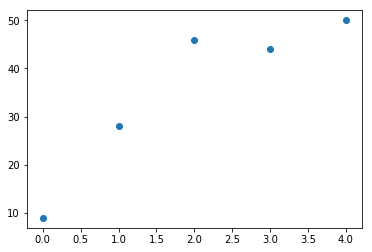

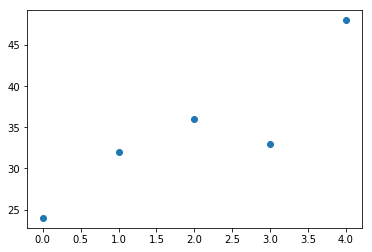

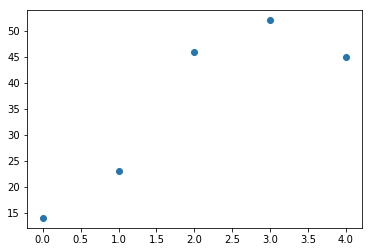

In [47]:
def get_trends(fac, quantiles=quantiles):
    '''This function uses the previous 2 defined to calculate a simple percentage of diabetic individuals.'''
    
    return round(get_diabetic(fac, quantiles)/get_bin_total(fac, quantiles)*100,0).drop('index', 1)


for i in factors:
    plt.scatter(get_trends(i).index, get_trends(i))
    plt.show()



Looking at the plots, there seems to be a general increase in diabetes cases as we move up the quantiles for all the risk factors, with the exception of some outliers. This was not so apparent by just looking at the initial scatter plots. Results will differ when the number of quantiles change but the general trend is upward as quantiles increase.

### Pairwise correlations and distributions of features

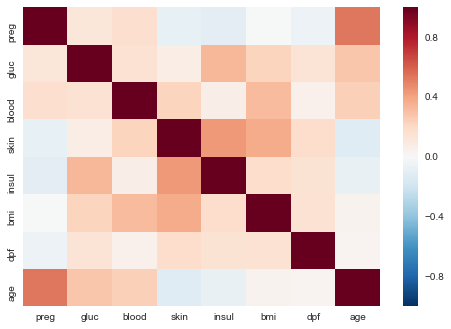

In [48]:
import seaborn as sns

featurescorr = df_train.iloc[:,0:8].corr()
sns.heatmap(featurescorr)
plt.show()

The graph above gives us a visual idea of the pairwise correlations (not to be mistaken for causality) between each of the 8 features. From the plot, it can be observed that age and pregnancy, skin thickness and insulin levels do have observable positive correlations. Although this is easy to read, the scatter graph below provides more information on each individual feature's frequency distribution as well as colour coding within each correlation scatterplot to identify any possible interactions.

/Users/jtsw/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/Users/jtsw/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


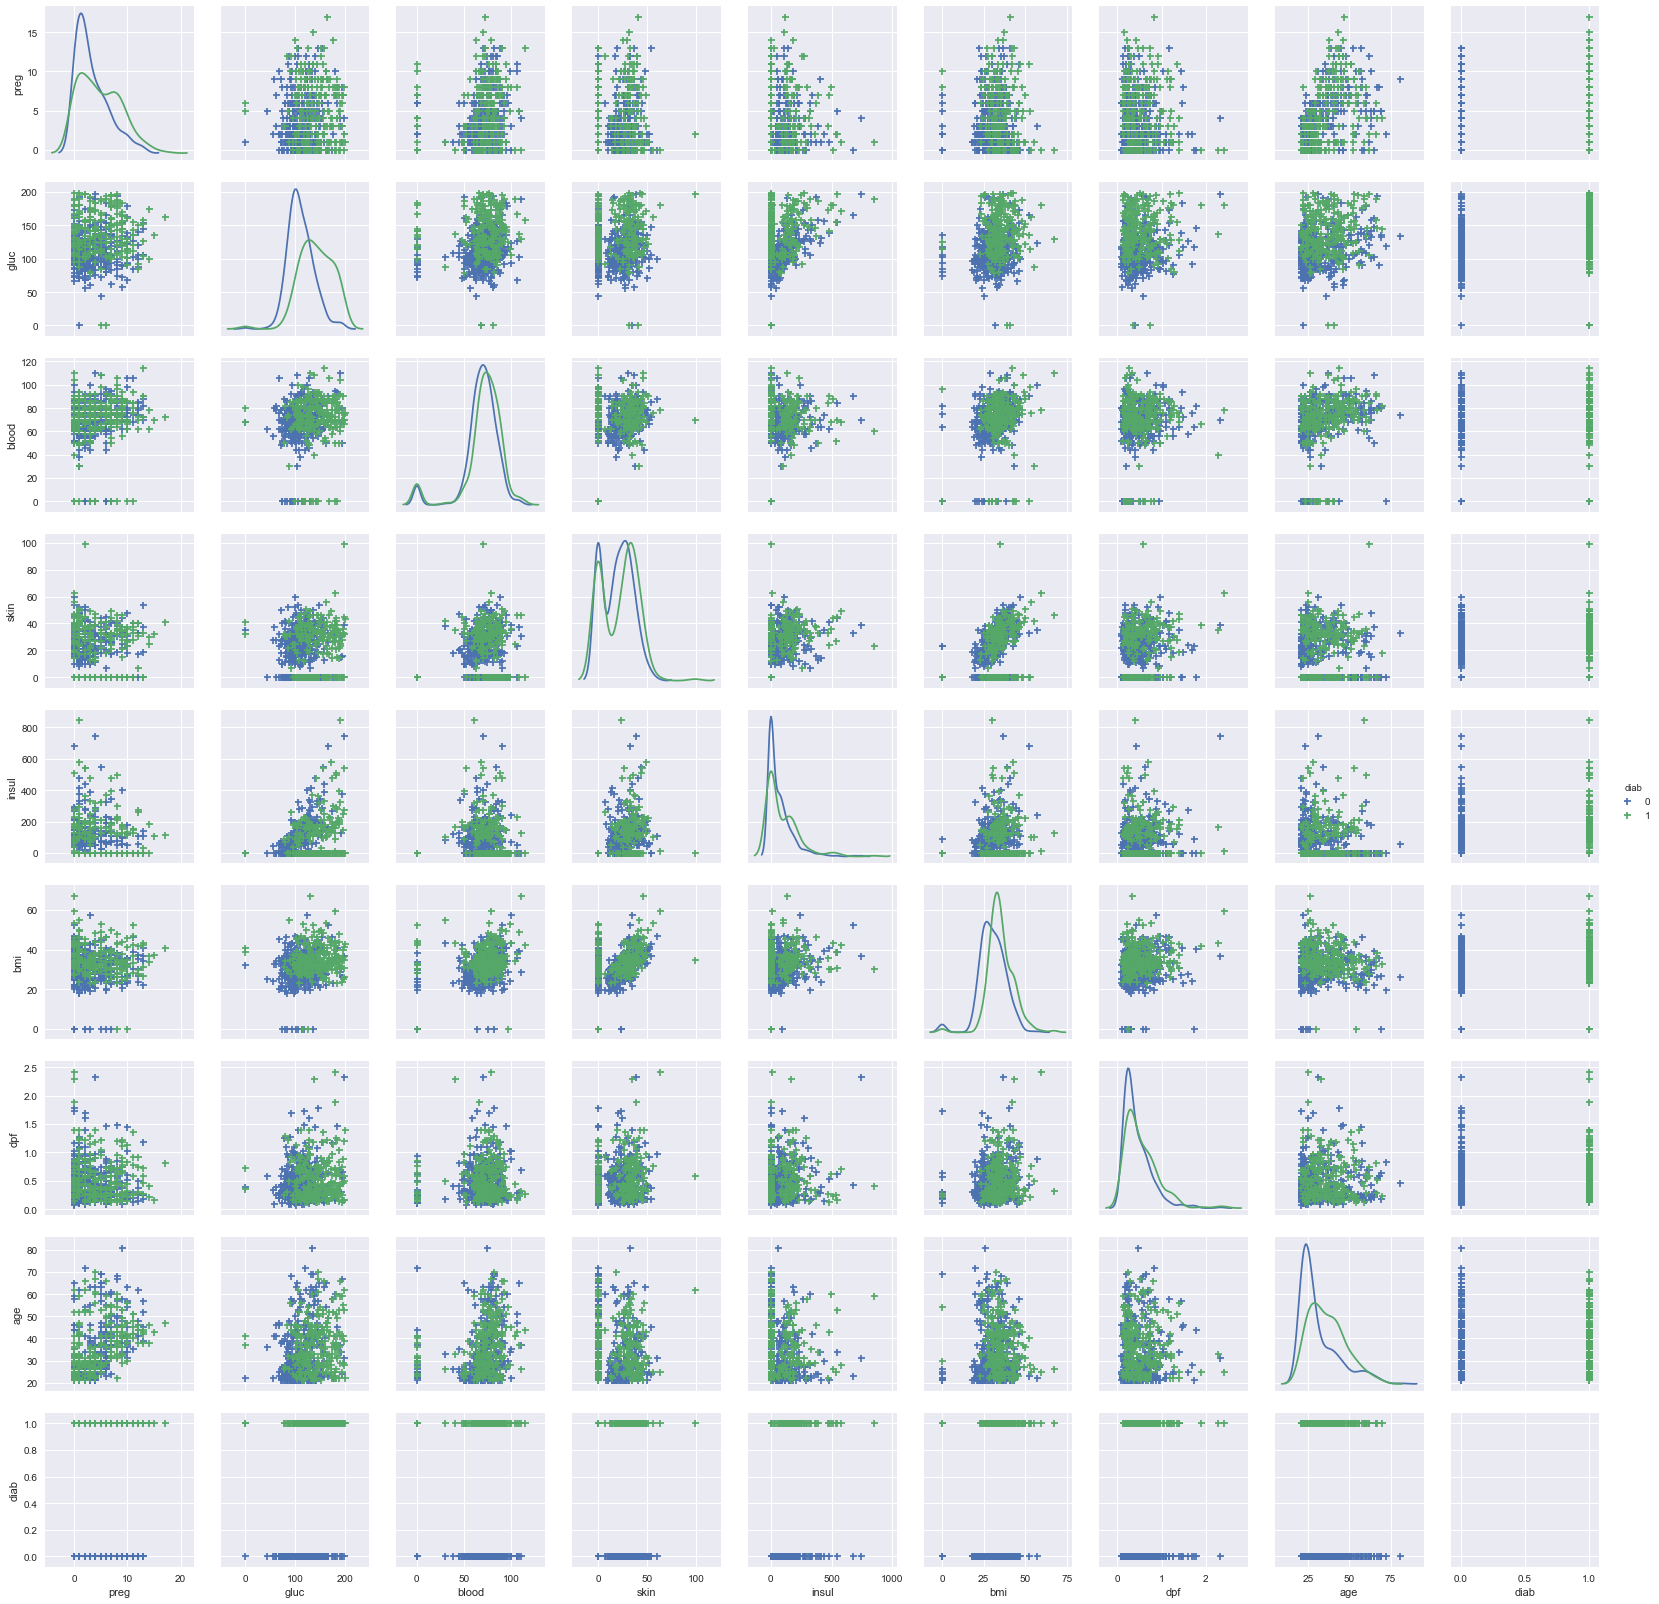

In [49]:
sns.pairplot(df_train, hue = 'diab', diag_kind = 'kde', markers = '+')
plt.show()

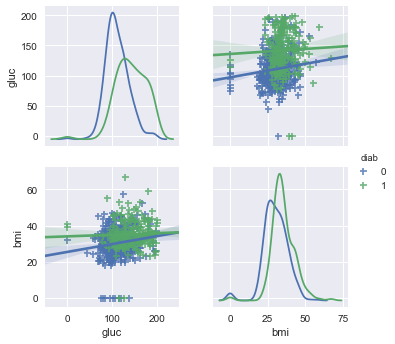

In [50]:
sns.pairplot(df_train, vars = ['gluc', 'bmi'], markers = '+', hue = 'diab', diag_kind = 'kde', kind = 'reg')
plt.show()

1. Scatter plots
The graphs above show all the pairwise scatter plots and a single instance of the variables gluc and bmi respectively. Although one can argue that there is a slight positive correlation between these 2 variables, it is still subjective and the relationship is not exactly significant. However, we can observe some sort of clustering happening for the diabetic patients with higher gluc values keeping bmi constant (refer to top right plot). Also, from the bottom left plot, we can somewhat argue that the green points (diabetic) start to cluster only when the bmi values go above a certain threshold, approximately 25 or so. <br><br>

2. Fitted distributions
From the top left graph, one can infer clearly that a the distribution of diabetic individuals (green) is more skewed to the left compared to the non diabetic patients (blue). This is also evident in the bmi distribution, although not as significant. This emphasizes the effect on each individual feature on the probability of diabetes discussed above.<br><br>

3. Interactions
Because of the ambiguity of the correlation plots, it is extremely difficult to identify any interactions between bmi and gluc on the result of diabetes. However, from what we can observe from the "best fit lines" at this point, it seems that there is little to no interaction between bmi and gluc on diabetes.

## Step 3: Model

Recall that a logistic regression is used when dealing with catergorical dependant variables, and the way to link our independent variables to the outcome is through the "inverse logit" or "sigmoid function", which is the natural log of the odds ratio.

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix


df_train_X = df_train.iloc[:,0:8]
df_train_y = df_train.iloc[:,-1]
df_test_X = df_test.iloc[:,0:8]
df_test_y = df_test.iloc[:,-1]

logreg = LogisticRegression()
logreg.fit(df_train_X, df_train_y)
y_predicted = logreg.predict(df_test_X)

print((confusion_matrix(df_test_y, y_predicted)))
print(classification_report(df_test_y, y_predicted))

[[93  7]
 [26 28]]
             precision    recall  f1-score   support

          0       0.78      0.93      0.85       100
          1       0.80      0.52      0.63        54

avg / total       0.79      0.79      0.77       154



### Model performance

The above 2 outputs display the performance of a logisitc regression done on the training set. Note that this assumes a threshold value of 0.5, meaning if the output from the model gives a probability of >0.5, the individual is taken to be in the '1' catergory of having diabetes. Due to the class imbalance of individuals with diabetes, the go-to accuracy metric may not be of much use. <br> (Example: If i had a classifier that just predicted that ALL individuals had no diabetes, my classifier would be correct almost 70% of the time, because 70% of my test set have no diabetes!) <br> Recall: <br>1.  that the format of a confusion matrix from left to right, top to bottm is: TN, FP, FN, TP. <br>2. $Accuracy = \dfrac{TP + TN}{TP + TN + FP + FN}$ <br>3. $Precision = \dfrac{TP}{TP + FP}$ <br>4. $Recall = \dfrac{TP}{TP + FN}$ <br>5. $F1 score = 2 * \dfrac{Precision * Recall}{Precision + Recall}$

As we can see from the outputs, the actual number of non-diabetic and diabetic individuals in the test set is 100 and 54 respectively. According to the metric known as accuracy above, this model has a score of 78.57%. Comparing this to a model which predicts all 0s (65%), a score of approximately 80% is only around 15% better. The precision of the model is 80%, which means that out of the times the model tells an individual that he/she has diabetes, th model is correct 80% of the time. On the other hand, the recall of the model is only at a 52%, which means that out of the actual individuals that are diabetic, the model only returns 52% of correct predictions. Overall, this means that although the model is quite accurate at 80% when it does return a positive, the number of positives it returns compared to the actual numbers are quite low at 52%. This will change as we change our threshold for our model which is current at 50%, and the results between the trade off is shown below with the ROC and AUC metrics.

### K - fold cross validation

In [90]:
cv = 5
cv_scores = cross_val_score(logreg, df_train_X, df_train_y, cv=cv)
print([round((scores*100),0) for scores in cv_scores])
print('Average 5-fold CV score %s' % round(np.mean(cv_scores)*100, 0) + '%')

[76.0, 75.0, 72.0, 73.0, 79.0]
Average 5-fold CV score 75.0%


The average CV score does not differ much, which suggests that the model generalizes well and does not really depend on data split.

### ROC curve and AUC

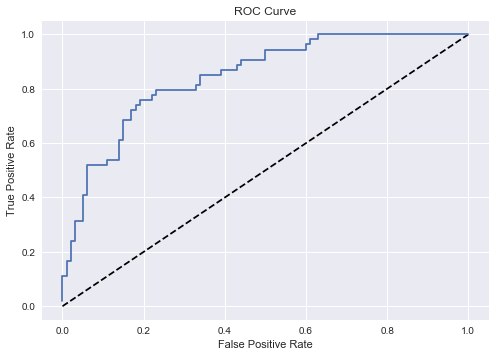

In [53]:
from sklearn.metrics import roc_curve

y_pred_prob = logreg.predict_proba(df_test_X)[:,1]
fpr, tpr, thresholds = roc_curve(df_test_y, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [101]:
from sklearn.metrics import roc_auc_score

aucmetric = roc_auc_score(df_test_y, y_pred_prob)
cv_metrics = cross_val_score(logreg, df_train_X, df_train_y, cv = cv, scoring = 'roc_auc')

print('The area under the curve is %s' % aucmetric)
print('The mean area under curve for %s ' %cv + 'fold cross validation is %s ' %np.mean(cv_metrics))


The area under the curve is 0.844814814815
The mean area under curve for 5 fold cross validation is 0.812134551495 


Recall that a classifier that just does random guessing will have an AUC of 0.5, which represents the area under the dashed line in the plot above. The score of 0.84 tells us that the model create is definitely better than random guessing, although there are still some issues regarding accuracy of predictions. The k-fold validation AUC score of 0.81 shows that the model generalizes well with different training sets as it is not farm off from the 0.84 score without cross validation.

## Step 4: Model interpretation

In [122]:
import math
def sigmoid(preg, gluc, blood, skin, insul, bmi, dpf, age):
    '''This function translates the model outputs back into the probability of an individual having diabetes given some parameter inputs.'''
    
    lincomb = (logreg.coef_[:,0]*preg) + (logreg.coef_[:,1]*gluc) + (logreg.coef_[:,2]*blood) + (logreg.coef_[:,3]*skin) + (logreg.coef_[:,4]*insul) + (logreg.coef_[:,5]*bmi) + (logreg.coef_[:,6]*dpf) + (logreg.coef_[:,7]*age)
    sig = 1/ (1 + math.exp(-lincomb))
    
    return print('The chance of diabetes for this individual is %s' %round(sig*100) + '%.')

In [120]:
import random
random.seed(123)
randint = random.randint(0,len(df_test_X)-1)
tester = df_test_X.iloc[randint, :]

sigmoid(tester[0], tester[1], tester[2], tester[3], tester[4], tester[5], tester[6], tester[7])

The chance of diabetes is 96%.


Recall that according to the logit model, the linear combination of weights and features labelled X, is defined as: <br> $ \hat{X} = log_e(\dfrac{p}{1-p})$ <br> This means that by taking the inverse function of the logit, we can extract the probabilities of an individual getting diabetes according to the calculated parameters, which would look like: <br> $\hat{p} = \dfrac{1}{1 + e^{-\hat{X}}}$

## Step 5: Conclusion

Although the logit classifier works better than random guessing, much can be improved on the model. This dataset is relatively small with only 768 entries. A larger and more substantial dataset would mean that the model has more entries to "learn" and thus produce more accurate results. Some areas for improvement would include: <br> 1. Exploring different classifiers such as K-NN, neural networks. <br> 2. Using hyperparameter tuning with GridSearchCV. <br> 3. Scaling or normalizing features. <br> 4. Use of different mix of features to.